# Data Science Basics

Welcome to the data science workshop!  
1. The basics of common data science packages.
2. What a problem might look like
3. About the stages in solving a statistical problem
4. Go through each of the stages using a simple model
5. Evaluate and construct a more improved model.

If we can get to this point, you will have a basic idea of what are the kinds of problem you might see in a data science context
and some basic ways of solving it. If we have time, we might go on and see some more advanced stuff such as:

* Regularization
* Resampling Methods
* Decision Trees

### Acknowledgements

The dataset in this workshop has been sourced from ISLR. This entire notebook has been written by consulting the following texts:

1. James, G., Witten, D., Hastie, T., &amp; Tibshirani, R. (n.d.). _An introduction to statistical learning: With applications in R_. 
2. William Cipolli & Roy Bower. _Data Analysis I with R_.

## Thinking in arrays

The first thing we want to do is import the packages that we will need. For now, this includes:
* NumPy: Stands for NUMeric PYthon. The de-facto library for handling matrices and vectors in Python which provides a wide array of mathematical functions.
* Pandas: Most common library for handling data. Think of it as a superpowered Excel.
* Matplotlib: A library for constructing plots.  
* Seaborn: An extension built on top of matplotlib that makes nicer plots.

In [377]:
# Import packages that we will need to use.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Let's start with something easy! Let's plot our favorite quadratic function $f: \mathbb{R} \rightarrow \mathbb{R}$ where $f(x) = x^2$.

In [378]:
X = np.linspace(-5, 5, 6)
X

array([-5., -3., -1.,  1.,  3.,  5.])

Essentially, the $\texttt{linspace}$ function generates 6 numbers equally spaced between $-5$ and $5$, including the endpoints. Now, let's apply our function $f$.

In [379]:
Y = X ** 2
Y

array([25.,  9.,  1.,  1.,  9., 25.])

Now, we have our $x$ and $y$ values, but our problem is that they are isolated. Let's put them into a table - a data structure we will now refer to as a _dataframe_.

In [380]:
df = pd.DataFrame({'x': X, 'f(x)': Y})
df

,x,f(x)
0,-5.0,25.0
1,-3.0,9.0
2,-1.0,1.0
3,1.0,1.0
4,3.0,9.0
5,5.0,25.0


This looks more like something we are used to! Or maybe, this?

In [381]:
pd.DataFrame.transpose(df)

,0,1,2,3,4,5
x,-5.0,-3.0,-1.0,1.0,3.0,5.0
f(x),25.0,9.0,1.0,1.0,9.0,25.0


Now, all we have to do is plot it!

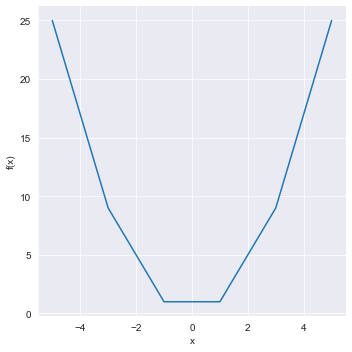

In [382]:
sns.set_style('darkgrid')
sns.relplot(x="x", y="f(x)", kind="line", data=df)

That looks _about_ right but not quite right. Let's reorganize our previous code and add more data points.

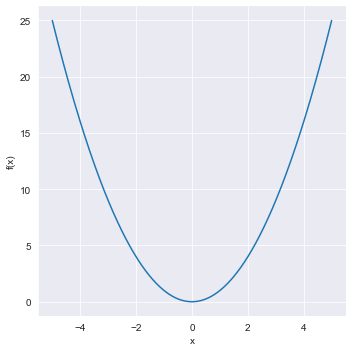

In [383]:
X = np.linspace(-5, 5, 1000)
Y = X ** 2
df = pd.DataFrame({'x': X, 'f(x)': Y})
sns.relplot(x="x", y="f(x)", kind="line", data=df)

### What is a statistical problem?

What we have done so far is cool and all, but it's not really data science. Where's the data? Where's the science? We need to construct an actual data science problem so that we know what we are dealing with. First, let's create some data that simulates the following function $g: \mathbb{R} \rightarrow \mathbb{R}$

$$ g(x) = 0.81x + 0.37x^2$$

In [384]:
X = np.linspace(-5.0, 5.0, 100)
Y = X * 0.81 + (X ** 2) * 0.37
df = pd.DataFrame({'x': X, 'g(x)': Y})
df.head(5)

,x,g(x)
0,-5.00000,5.200000
1,-4.89899,4.911856
2,-4.79798,4.631262
3,-4.69697,4.358219
4,-4.59596,4.092725


Now, let's plot it and see what it looks like.

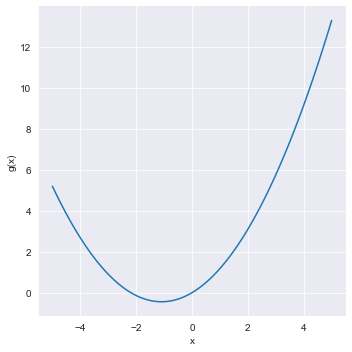

In [385]:
sns.relplot(x='x', y='g(x)', kind='line', data=df)

We are now going to create some **noisy** data. Essentially, we are going to draw $100$ numbers from $\mathcal{N}(0,1)$ distribution -- one for each $x$ point we have -- and add the random number to the correct $g(x)$ value. Let's do that!

In [386]:
Y2 = (X * 0.81 + (X ** 2) * 0.37) + np.random.normal(0,1,100)
Y2[:5]

array([6.47031355, 5.17847393, 4.5289198 , 5.4033547 , 3.01181132])

Let's call this $G$: it is a noisy realization of our true function $g$. Let's also convert it into a dataframe.

In [387]:
df_error = pd.DataFrame({'G(x)': Y2})
df_error.head(5)

,G(x)
0,6.470314
1,5.178474
2,4.528920
3,5.403355
4,3.011811


It will be much easier if we can see the difference between the true $g$ and the noisy $G$ side by side. So let's **concatenate** the two dataframes ...

In [388]:
df = pd.concat([df, df_error], axis=1)
df.head(5)

,x,g(x),G(x)
0,-5.00000,5.200000,6.470314
1,-4.89899,4.911856,5.178474
2,-4.79798,4.631262,4.528920
3,-4.69697,4.358219,5.403355
4,-4.59596,4.092725,3.011811


... and plot them together!

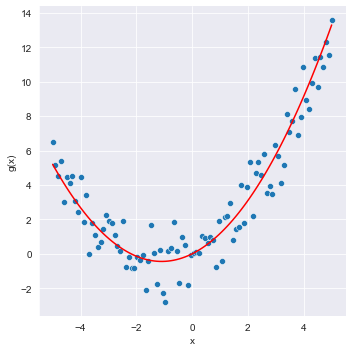

In [389]:
p = sns.relplot(x='x', y='G(x)', data=df, kind='scatter')
p.map_dataframe(sns.lineplot, 'x', 'g(x)', color='r')

This brings us to the crux of the problem. In reality, almost all the data we collect is noisy when what we are truly interested in is the true function $g$. The goal of data science is to use statistical techniques to figure out what $g$ is. We can use our estimation of $g$ which we can call $\hat{g}$ for many different purposes but for this workshop we are concerned with the purpose of prediction. That is, if I give you a random value of $x$ can you come up with some estimated function $\hat{g}$ that is as close to the correct value of $g(x)$ as possible? For example, consider the following model:

$$\hat{g}_1(x) = 0.125e^{x}$$

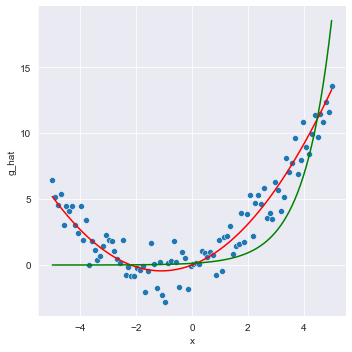

In [390]:
df = pd.concat([df, pd.DataFrame({'g_hat':np.exp(X)*0.125})], axis=1)
p = sns.relplot(x='x', y='G(x)', data=df, kind='scatter')
p.map_dataframe(sns.lineplot, 'x', 'g(x)', color='r')
p.map_dataframe(sns.lineplot, 'x', 'g_hat', color='g', )

## Modelling Graduation Rate

Since we now know what a general data science problem might look like, let's tackle one and see what sort of prediction we can make.

In [391]:
#%reset -f

Our goal for today is to be able to predict the percentage of the student body that graduates in a class year -- i.e the graduation rate -- given some descriptors for a particular college. We will use statistics from 777 US Colleges from the 1995 issue of the US News report. If you are using Jupyter, please go to https://www.statlearning.com/resources-second-edition, scroll down to the Data Sets drop down menu and click on the **College.csv** file to download it. Then move the file from your Downloads folder to wherever your notebook file is. If you are using Google Colab, use the following command.

In [392]:
#!wget https://www.statlearning.com/s/College.csv

Now, that we have the dataset on hand, let's mess around with it.

In [393]:
df = pd.read_csv("College.csv")
df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


We see that we have rows which correspond to particular colleges with columns that provide descriptors for that college -- this includes things like the number of applications, acceptances, out of state tuition, student faculty ratio, etc. What we want to predict using these _features_ is the final column: the graduation rate.

For some interesting results ...

In [394]:
df.iloc[123,:]

Unnamed: 0     Colgate University
Private                       Yes
Apps                         4856
Accept                       2492
Enroll                        727
Top10perc                      46
Top25perc                      75
F.Undergrad                  2649
P.Undergrad                    25
Outstate                    19510
Room.Board                   5565
Books                         500
Personal                      750
PhD                            95
Terminal                       98
S.F.Ratio                    10.5
perc.alumni                    45
Expend                      15494
Grad.Rate                      93
Name: 123, dtype: object

### Data Analysis Pipeline

![pipeline](pipeline.png)

### Preprocessing the dataset

#### Dropping features
First, we don't need to consider the name column. For our purposes, it doesn't matter what the name of the college is so let's remove it.

In [395]:
df = df.drop(['Unnamed: 0'], axis=1)

#### Remapping features

Now, it's much easier and convenient -- especially for the computer -- to work with only numeric data.

In [396]:
df['Private'] = df['Private'].replace({'Yes': 1, 'No': 0})

In a lot of cases, the '.' in the column headers can be problematic to deal with for some algorithms so we will remove them.

In [397]:
df = df.rename(columns={x: x.replace('.',"") for x in list(df.columns)})

If we take a quick look at our dataset at this point...

In [398]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


#### Missing Data

We can check to see if there are any values that are missing.

In [399]:
df[df.isna().any(axis=1)]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate


In the real world, we might not always be so lucky -- so it is always a good idea to check if there are values missing. If you find some, you can make the decision to either **impute** them or remove the rows entirely.

#### Normalization

One commonly used preprocessing technique is normalization. We rescale every numeric feature $d$ to a common unit by subtracting the mean $\mu_d$ and dividing it by the standard deviation $\sigma_d$

In [400]:
df.iloc[:,1:-1] = (df.iloc[:,1:-1] - df.iloc[:,1:-1].mean()) / df.iloc[:,1:-1].std()

### Exploration

Now, let's try and see if we can find any features that may be useful in predicting the graduation rate.

<AxesSubplot:xlabel='Apps', ylabel='GradRate'>

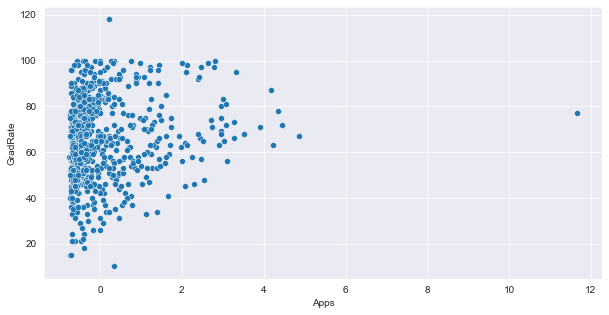

In [401]:
sns.scatterplot(x='Apps',y='GradRate',data=df)

We see one school that has a graduation rate of $\approx 120\%$! We will remove rows that have at least one feature that is $3$ s.ds away from the mean.

In [402]:
from scipy import stats
df = df[(np.abs(stats.zscore(df.iloc[:,:-1])) < 3).all(axis=1)]

We can try and see if there are any low hanging fruits -- i.e variables that have a strong, linear relationship between themselves and the graduation rate.

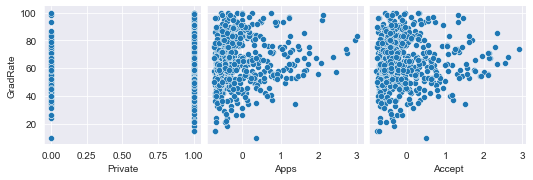

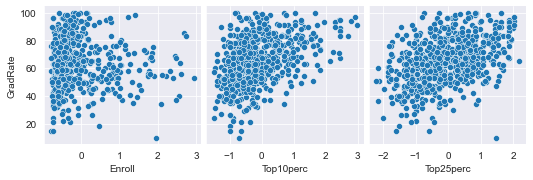

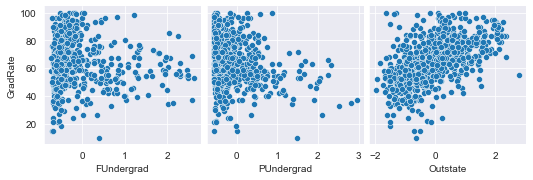

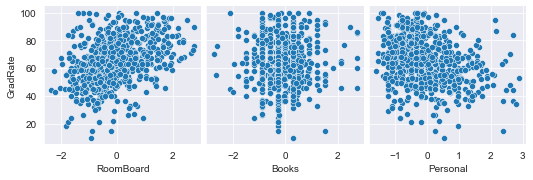

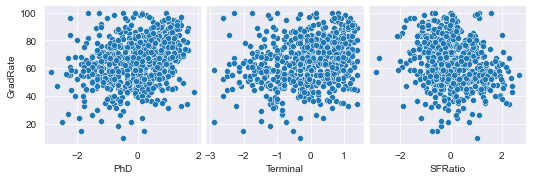

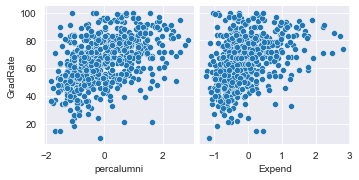

In [403]:
ind_v = list(df.columns)[:-1]
rows = [(i,i+3) for i in [0,3,6,9,12,15]]
for i in rows:
    first, last = i
    sns.pairplot(data=df, x_vars=ind_v[first:last], y_vars='GradRate')

### Simple Linear Regression

A simple linear regression model is of the form 
$$Y = \beta_0 + \beta_1 x + \epsilon$$

Without delving too much into the math, this essentially means that if we ignore the contribution of a feature $x$ then $\beta_0$ represents the mean of $Y$. Moreover, $\beta_1$ represents the
change in the expected value of $Y$ brought about by a unit change in $x$.

So, let's first import the necessary modules. We will be using the **Statsmodels** package for this part.

In [404]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Using linear regression we can try and answer a couple of different questions...
* Is there any relationship between the graduation rate and a particular feature?
* How strong is the relationship?
* Can we use this relationship for prediction?

So how do we answer them? Let's say we are want to look at the number of students accepted and see if there is a relationship between the graduation rate $Y$ and the number of students accepted $x$. Let's consider two hypotheses:
$$H_0 : \text{There is no relationship between the graduation rate and \# of accepted students} \iff H_0 : \beta_1 = 0$$
$$H_a : \text{There is some relationship between the graduation rate and \# of accepted students} \iff H_a : \beta_1 \neq 0$$

So how do we know if $\beta_1 \neq 0$? Remember, we will never have access to the actual relationship between these two variables but rather estimates. Therefore, if we have a lot of variability in our estimation of $\beta_1$ we would need a large enough value away from 0 to be able to confidently say that $H_a$ is correct. Conversely, if the deviation is very small we can be satisfied with very smaller values of $\beta_1$. 

Since we know how that works, what we will calculate is the $t$ statistic which represents how many standard deviations our estimate of $\beta_1$ is away from $0$. We then calculate the probability that we observe a value like this randomly -- this is the famed $p$-value. We set a specific probability threshold (0.05 usually) and ask: is the chance of observing this value of $\beta_1$ purely due to chance lower than $5\%$? Therefore, if our $p$-value is less than 0.05 we can **reject** $H_0$ and conclude that there is some relationship.

So, let's choose a variable that seems likely to influence the graduation rate and construct a model. We will need to designate a formula that represents what our target and feature.

In [405]:
res = smf.ols(formula = "GradRate ~ C(Private)", data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     90.22
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.54e-20
Time:                        16:59:30   Log-Likelihood:                -2838.2
No. Observations:                 683   AIC:                             5680.
Df Residuals:                     681   BIC:                             5690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          55.2118      1.186     46.571      0.000      52.884      57.539
C(Private)[T.1]    12.9929      1.368      9.498      0.000      10.307      15.679
==============================================================================
Omnibus:                       12.005   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.597
Skew:                          -0.278   Prob(JB):                      0.00184
Kurtosis:                       3.364   Cond. No.                         3.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's try out some other feature and see what we get.

In [406]:
res2 = smf.ols(formula = "GradRate ~ Expend", data=df).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           6.21e-23
Time:                        16:59:30   Log-Likelihood:                -2831.9
No. Observations:                 683   AIC:                             5668.
Df Residuals:                     681   BIC:                             5677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.2400      0.599    110.579      0.000      65.064      67.416
Expend         9.2522      0.905     10.227      0.000       7.476      11.029
==============================================================================
Omnibus:                        5.866   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                6.366
Skew:                          -0.145   Prob(JB):                       0.0415
Kurtosis:                       3.374   Cond. No.                         1.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, let's choose something different.

In [407]:
res3 = smf.ols(formula = "GradRate ~ Accept", data=df).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.662
Date:                Wed, 30 Mar 2022   Prob (F-statistic):              0.103
Time:                        16:59:30   Log-Likelihood:                -2879.4
No. Observations:                 683   AIC:                             5763.
Df Residuals:                     681   BIC:                             5772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.2227      0.647    100.824      0.000      63.953      66.493
Accept         1.5802      0.969      1.632      0.103      -0.321       3.482
==============================================================================
Omnibus:                        5.365   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.425
Skew:                          -0.201   Prob(JB):                       0.0664
Kurtosis:                       2.829   Cond. No.                         1.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluation

We have found two simple linear models for which there is some relationship to graduation rate, so how do we choose between them? 

In [408]:
print(f"{res.rsquared} vs {res2.rsquared}")

0.11697960370346128 vs 0.13312649462240822


$R^{2}$, also called the coefficient of determination, essentially asks how much of the variability in the target, proportionally speaking, can be explained by the feature.

### Rinse & Repeat

What we have done is one simple iteration of the model fitting -> evaluation loop. We can now construct much more complicated models and use more robust metrics to evaluate said models.

### Multiple Linear Regression

A multiple linear regression is of the form:
$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \epsilon$$
We now consider multiple features in our model; therefore, each of the $\beta_i$ correspond to the change in the target variable due to a one unit change in $x_i$ assuming _every other variable is held constant_. We have two assumptions in this model: (i) the effects of the variables is additive and (ii) the relationship between the target and the variable is linear. Of course, these assumptions won't always hold and we will look at ways to relax these assumtions later.

Our hypotheses in this case are as follows, assuming we include $d$ variables in our model:
$$H_0 : \text{There is no relationship between the graduation rate and any of the included features} \iff H_0 : \beta_1 = \beta_2 = \dots = \beta_d = 0$$
$$H_a : \text{There is some relationship between the graduation rate and at least one of the included features} \iff \exists i \in (1,d) : H_a : \beta_i \neq 0$$

In [409]:
res4 = smf.ols(formula = "GradRate ~ C(Private) + Expend", data=df).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     78.31
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           2.47e-31
Time:                        16:59:30   Log-Likelihood:                -2809.9
No. Observations:                 683   AIC:                             5626.
Df Residuals:                     680   BIC:                             5639.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          58.9010      1.236     47.662      0.000      56.475      61.327
C(Private)[T.1]     9.3850      1.395      6.727      0.000       6.646      12.124
Expend              7.1388      0.931      7.665      0.000       5.310       8.967
==============================================================================
Omnibus:                       12.303   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.896
Skew:                          -0.200   Prob(JB):                     0.000353
Kurtosis:                       3.631   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A key thing to note is that the $R^2$ value will always increase whenever you add predictors. Therefore, to maximize $R^{2}$ you can just add all the predictors and call it a day!
Thus, the adjusted $R^{2}$ is a better estimation of the variability explained by the model since it penalizes the inclusion of redundant variables.

We can see the $p$-values for the individual features in the regression. If we want to get a $p$-value for the regression itself, you need to use the F-statistic. So ...

In [410]:
res4.f_pvalue

2.466163655339506e-31

### Additivity?

$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$$

Consider the model defined above. Unlike the previous models, this one can account for synergistic effects of the predictors.

In [422]:
res5 = smf.ols(formula = "GradRate ~ C(Private) * Expend", data=df).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     52.56
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.48e-30
Time:                        17:01:59   Log-Likelihood:                -2809.4
No. Observations:                 683   AIC:                             5627.
Df Residuals:                     679   BIC:                             5645.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 57.6299      1.757     32.799      0.000      54.180      61.080
C(Private)[T.1]           10.6602      1.875      5.685      0.000       6.978      14.342
Expend                     4.6793      2.590      1.807      0.071      -0.406       9.765
C(Private)[T.1]:Expend     2.8246      2.776      1.018      0.309      -2.626       8.275
==============================================================================
Omnibus:                       11.562   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.888
Skew:                          -0.189   Prob(JB):                     0.000585
Kurtosis:                       3.616   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It looks like adding an interaction term didn't help us that much. However, let's look at a different set of predictors.

In [ ]:
res6 = smf.ols(formula = "GradRate ~ C(Private) * Top10perc", data=df).fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     80.78
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.07e-44
Time:                        16:13:50   Log-Likelihood:                -2776.5
No. Observations:                 683   AIC:                             5561.
Df Residuals:                     679   BIC:                             5579.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    58.3350      1.262     46.210      0.000      55.856      60.814
C(Private)[T.1]               9.9857      1.408      7.090      0.000       7.220      12.751
Top10perc                     7.2051      1.490      4.836      0.000       4.280      10.131
C(Private)[T.1]:Top10perc     0.9041      1.677      0.539      0.590      -2.388       4.196
==============================================================================
Omnibus:                        5.363   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.968
Skew:                          -0.121   Prob(JB):                       0.0506
Kurtosis:                       3.389   Cond. No.                         5.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regularization

We will now shift from the inferential side of data science to focusing purely on performance. We will try to iteratively increase the $R^2$ of our model and with each step we will look at some of the options available to us. For now, let's consider the technique of _regularization_ for which we will use a model known as LASSO. LASSO stands for Least Absolute Shrinkage and Selection Operator -- which might give a hint to how it works. Rather than selecting which of the features to include in your model, you pass all the predictors into LASSO. The shrinkage part operates on the coefficients of each of the predictors. If there are redundant or collinear features, LASSO will penalize their inclusion and shrink their coefficients towards zero. The strength of this penalization is controlled by a factor $\lambda$.

Let's import the model from the sklearn package. We will also need to convert our dataframe to NumPy matrices.

In [429]:
from sklearn import linear_model
X = df.iloc[:,0:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

We can then fit the LASSO model onto our data ...

In [430]:
res_reg = linear_model.Lasso(alpha=0.185)
res_reg.fit(X, Y)

Lasso(alpha=0.185)

... and get the result

In [433]:
res_reg.score(X,Y)

0.4308675685843706

## Cross Validation

A big problem with our previous approach is that we were fitting our model on the same dataset that we were evaluating it on. Therefore, our estimation of our model's performance is biased and optimistic. Cross validation is a resampling technique where we partition our dataset intro chunks. We then fit multiple models with the same specification by taking one chunk as the test set and the rest as training data. We then look at the average metric across each of the _folds_ as an indication of how our model works.

Let's try and fit models with the same parameter as the previous iteration -- only this time we will fit it across different folds.

In [425]:
from sklearn.model_selection import cross_val_score
model = linear_model.Lasso(alpha=0.185)
results = cross_val_score(model, X, Y, cv=5, n_jobs=-1, scoring='r2')

For the moment of truth, let's see what the average $R^{2}$ is...

In [426]:
sum(results)/len(results)

0.39602651267775496

As you can see, our regularized model without cross validation was overestimating how much of the variance it could explain.

### Other Estimators

Up until this point, we were only working with linear models. Let's try out some more stuff!

In [476]:
from sklearn.tree import DecisionTreeRegressor

In [475]:
clf = DecisionTreeRegressor(random_state=0, max_depth=20)
results = cross_val_score(clf, X, Y, cv=5, scoring='r2')
sum(results)/len(results) * -1

0.4575391611437598